<a href="https://colab.research.google.com/github/EdisonMoreira/-aquecimento-formacao-infra/blob/master/Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Escritório de Dados</font>

## Aquecimento para Formação de Infraestrutura
## Edison Moreira
### Iplanrio / Diretoria de Sistemas (DSI) / Gerência de Arquitetura e Integrações (GAI)

## Pipeline
### Etapa 1: Entendendo os dados 🎲

- **Objetivo:** nessa etapa, você deve somente ingerir dados da API do `randomuser.me` e observar o formato dos dados, tentando imaginar como eles poderiam ser usados para construir uma tabela.
- **Descrição da solução:** a solução dessa etapa consiste em uma função para consumir a API na URL `https://randomuser.me/api/` e retornar um dicionário com os dados.

## Instalando e Carregando Pacotes

In [101]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.10


In [102]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
# Import da package para tratamento de acesso a uma API
import requests

## Ingerindo os Dados

Acessando os dados na API Random User

Confirmando o sucesso do acesso que é 
API Status Code 200: Everything went okay, 
and the result has been returned (if any).

In [104]:
response = requests.get("https://randomuser.me/api/")
print(response.status_code)

200


Identificando quais ão a package/classe do objeto response

In [105]:
type(response)

requests.models.Response

Exibindo o conteúdo do response que tem o formato json,
sendo a formatação de dictionary

In [106]:
response.json()

{'results': [{'gender': 'female',
   'name': {'title': 'Ms', 'first': 'Daniela', 'last': 'Cruz'},
   'location': {'street': {'number': 7192,
     'name': 'Calle de Alberto Aguilera'},
    'city': 'Arrecife',
    'state': 'Castilla la Mancha',
    'country': 'Spain',
    'postcode': 10369,
    'coordinates': {'latitude': '-34.4335', 'longitude': '159.0940'},
    'timezone': {'offset': '+5:45', 'description': 'Kathmandu'}},
   'email': 'daniela.cruz@example.com',
   'login': {'uuid': '42dcb414-0c17-44da-b660-0bb77881a0ea',
    'username': 'beautifulbear730',
    'password': 'goku',
    'salt': 'XfCs1OTy',
    'md5': '2f70f5e965eee1b4cf1a3ed0ba0dce2c',
    'sha1': 'a95215fb529a134cb716669ac6c2cac24e02aa94',
    'sha256': '51ecbb0daa9f8f80897df809923ba3cfb2b0d14d39b3d2315bf2745825d9663f'},
   'dob': {'date': '1983-10-25T05:45:34.801Z', 'age': 39},
   'registered': {'date': '2011-01-29T05:59:19.955Z', 'age': 12},
   'phone': '955-060-868',
   'cell': '610-090-129',
   'id': {'name': 'DNI', 

### Etapa 2: Coletando dados 💾

- **Objetivo:** nessa etapa, você deve coletar dados da API e armazená-los em um arquivo CSV.
- **Descrição da solução:** a solução dessa etapa consiste em uma função para coletar uma quantidade `n` de dados da API (sendo `n` um valor fornecido via parâmetro da função), manipulá-los para montar um `pandas.DataFrame` e salvar o resultado em um arquivo CSV.
**Dicas:**
  - Para tornar os dados mais fáceis de manipular no futuro, faça com que o `DataFrame` seja "plano", ou seja, cada coluna seja um único atributo do objeto.
  - Para ter dados suficientes para uma análise razoável nas próximas etapas, recomendamos `n>=500`.

> Criar função qu receba parametro Args1 para fazer Args1 acessos a API
Juntando cada leitura (append) ao dicitionario

In [107]:
# Import da packages
# para tratamento de acesso a uma API
# para criação e processamento de Pandas Dataframe
import requests as reqs
import pandas as pd

In [91]:
# Função para coletar uma quantidade n de dados da API (sendo n um valor fornecido via parâmetro da função),
def coletaDado (quantidadeDado: int):
    parametroAPI="https://randomuser.me/api/?results=" + str(quantidadeDado)
    print(parametroAPI)
    return reqs.get(parametroAPI)

In [108]:
responseDados = coletaDado(5)
print(responseDados.status_code)

https://randomuser.me/api/?results=5
200


In [109]:
type(responseDados)

requests.models.Response

In [110]:
responseDict=responseDados.json()

In [111]:
type(responseDict)

dict

In [112]:
import json
from pandas import json_normalize




In [113]:
# Use json_normalize() to convert JSON (dict, list of dicts) to DataFrame
df = json_normalize(responseDict['results']) 
print(df)

  gender                        email           phone            cell nat  \
0   male      giray.aykac@example.com  (865)-026-2683  (599)-887-6060  TR   
1   male    tristan.morin@example.com    W99 I82-2332    D28 X84-7238  CA   
2   male    tormod.reiten@example.com        24514308        44912836  NO   
3   male    robert.moreno@example.com     01222 73521    07174 627929  GB   
4   male  romain.fournier@example.com  01-53-10-53-11  06-65-32-39-64  FR   

  name.title name.first name.last  location.street.number  \
0         Mr      Giray     Aykaç                    3435   
1         Mr    Tristan     Morin                    1180   
2         Mr     Tormod    Reiten                    7066   
3         Mr     Robert    Moreno                    3037   
4         Mr     Romain  Fournier                    8079   

  location.street.name  ...  \
0     Talak Göktepe Cd  ...   
1        Frederick Ave  ...   
2          Åsdalsveien  ...   
3            York Road  ...   
4         Rue d

In [ ]:
# Imports
import re
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_name = "binary.csv"

def retornaArq(file_name):
    df = pd.read_csv(file_name)
    return df.describe()
    
retornaArq(file_name)

Import da package para acesso e tratamento dos países (Country)

In [7]:
# Instala o pacote
# https://pypi.org/project/pycountry/
!pip install -q pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 71.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## 8- Qual o Número de Filmes Produzidos Por País?

Número de filmes produzidos por país.

In [ ]:
# Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            ''' 

In [ ]:
# Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [ ]:
display(resultado8)

,region,Number_of_movies
0,AD,22
1,AE,321
2,AF,108
3,AG,12
4,AL,1230
...,...,...
227,YUCS,146
228,ZA,2930
229,ZM,11
230,ZRCD,2


In [ ]:
# Shape
resultado8.shape

(232, 2)

In [ ]:
# Número de linhas
resultado8.shape[0]

232

In [ ]:
# Listas auxiliares
nomes_paises = []
contagem = []

In [ ]:
# Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except: 
        continue

In [ ]:
# Prepara o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [ ]:
# Ordena o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [ ]:
# Visualiza
df_filmes_paises.head(10)

,country,Movie_Count
198,United States,255987
65,United Kingdom,113225
96,Japan,87815
63,France,80993
89,India,70743
32,Canada,67483
47,Germany,65316
93,Italy,63060
26,Brazil,61825
58,Spain,61704


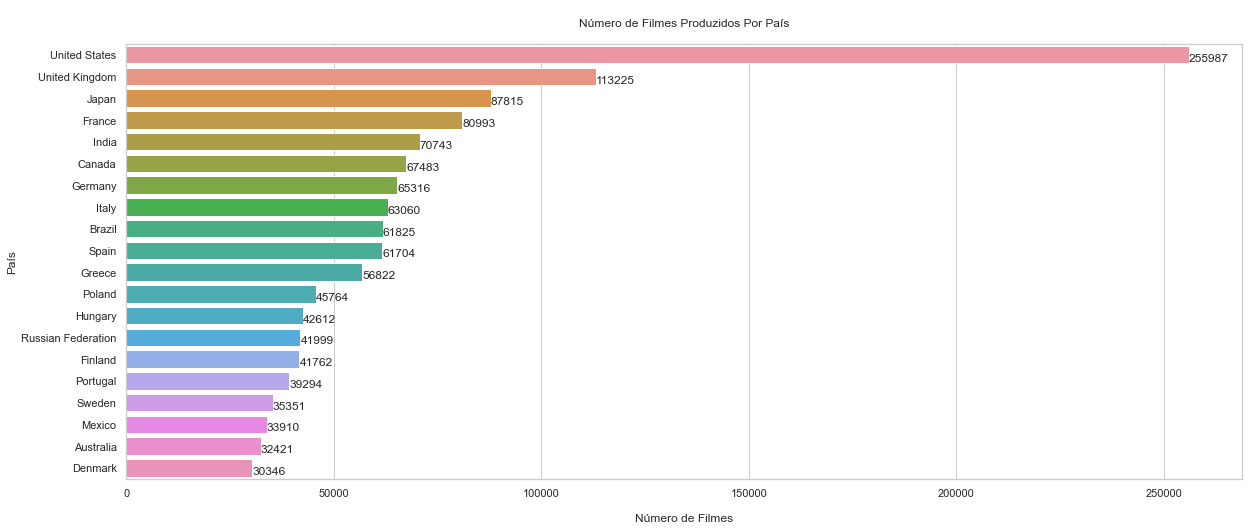

In [ ]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

## 9- Quais São os Top 10 Melhores Filmes?

Top 10 filmes com melhor avaliação e mais de 25 mil votos.

In [ ]:
# Consulta SQL
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            ''' 

In [ ]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

In [ ]:
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Chaos Class,"Comedy,Drama",9.3
2,The Godfather,"Crime,Drama",9.2
3,CM101MMXI Fundamentals,"Comedy,Documentary",9.2
4,Soorarai Pottru,Drama,9.1
5,12 Angry Men,"Crime,Drama",9.0
6,The Godfather: Part II,"Crime,Drama",9.0
7,The Dark Knight,"Action,Crime,Drama",9.0
8,Dara of Jasenovac,"Drama,War",9.0
9,David Attenborough: A Life on Our Planet,"Biography,Documentary",9.0


## 10- Quais São os Top 10 Piores Filmes?

Top 10 filmes com pior avaliação e mais de 25 mil votos.

In [ ]:
# Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            ''' 

In [ ]:
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [ ]:
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Cumali Ceber,Comedy,1.0
1,Smolensk,"Drama,Thriller",1.1
2,Sadak 2,"Action,Drama",1.1
3,Reis,"Biography,Drama",1.4
4,Justin Bieber: Never Say Never,"Documentary,Music",1.6
5,Manos: the Hands of Fate,"Drama,Horror",1.8
6,Radhe,"Action,Crime,Thriller",1.8
7,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.9
8,The Hottie & the Nottie,"Comedy,Romance",1.9
9,Disaster Movie,"Comedy,Sci-Fi",1.9


# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>

Parabéns se você chegou até aqui. Use o voucher PYTHONDSA9642 para comprar qualquer curso ou Formação da DSA com 5% de desconto.